<a href="https://colab.research.google.com/github/harshdsdh/MLstuff/blob/master/denoisingDataUsingAutoEncoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install imgaug

In [2]:
%tensorflow_version 1.x
import tensorflow as tf 

import IPython
import functools
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

# Download and import the MIT 6.S191 package
!pip install mitdeeplearning
import mitdeeplearning as mdl

TensorFlow 1.x selected.


In [3]:
import sys
import warnings
import os
import glob
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import cv2
from sklearn.model_selection import train_test_split

from keras.layers import *
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from keras.models import Model, Sequential
from keras.metrics import *
from keras.optimizers import Adam, RMSprop
from scipy.stats import norm
from keras.preprocessing import image
from keras import datasets

from keras import backend as K

from imgaug import augmenters
import matplotlib.pyplot as plt
plt.gray()

Using TensorFlow backend.


<Figure size 432x288 with 0 Axes>

In [0]:
(x_train,y_train),(x_test,y_test) = datasets.fashion_mnist.load_data()

In [0]:
x_train = x_train/255.
x_test = x_test/255.

x_train  =x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

In [6]:
x_train.shape

(60000, 28, 28, 1)

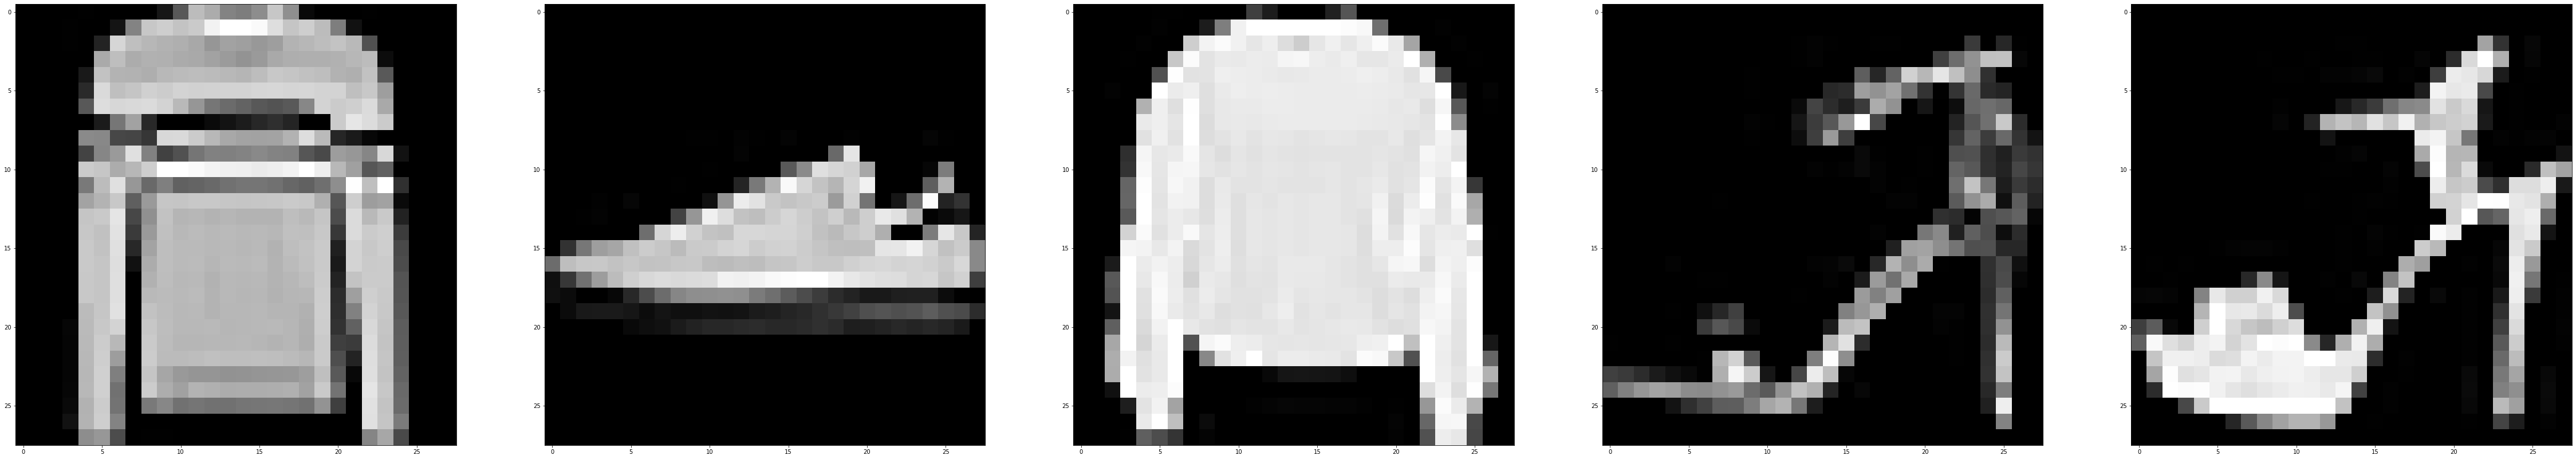

In [7]:
f,ax = plt.subplots(1,5)
f.set_size_inches(80,40)
for i in range(5,10):
  ax[i-5].imshow(x_train[i,:,:,0].reshape(28,28))

In [0]:
noise = augmenters.SaltAndPepper(0.1)
seq_object = augmenters.Sequential([noise])

train_x_n = seq_object.augment_images(x_train*255)/255
val_x_n = seq_object.augment_images(x_test*255)/255

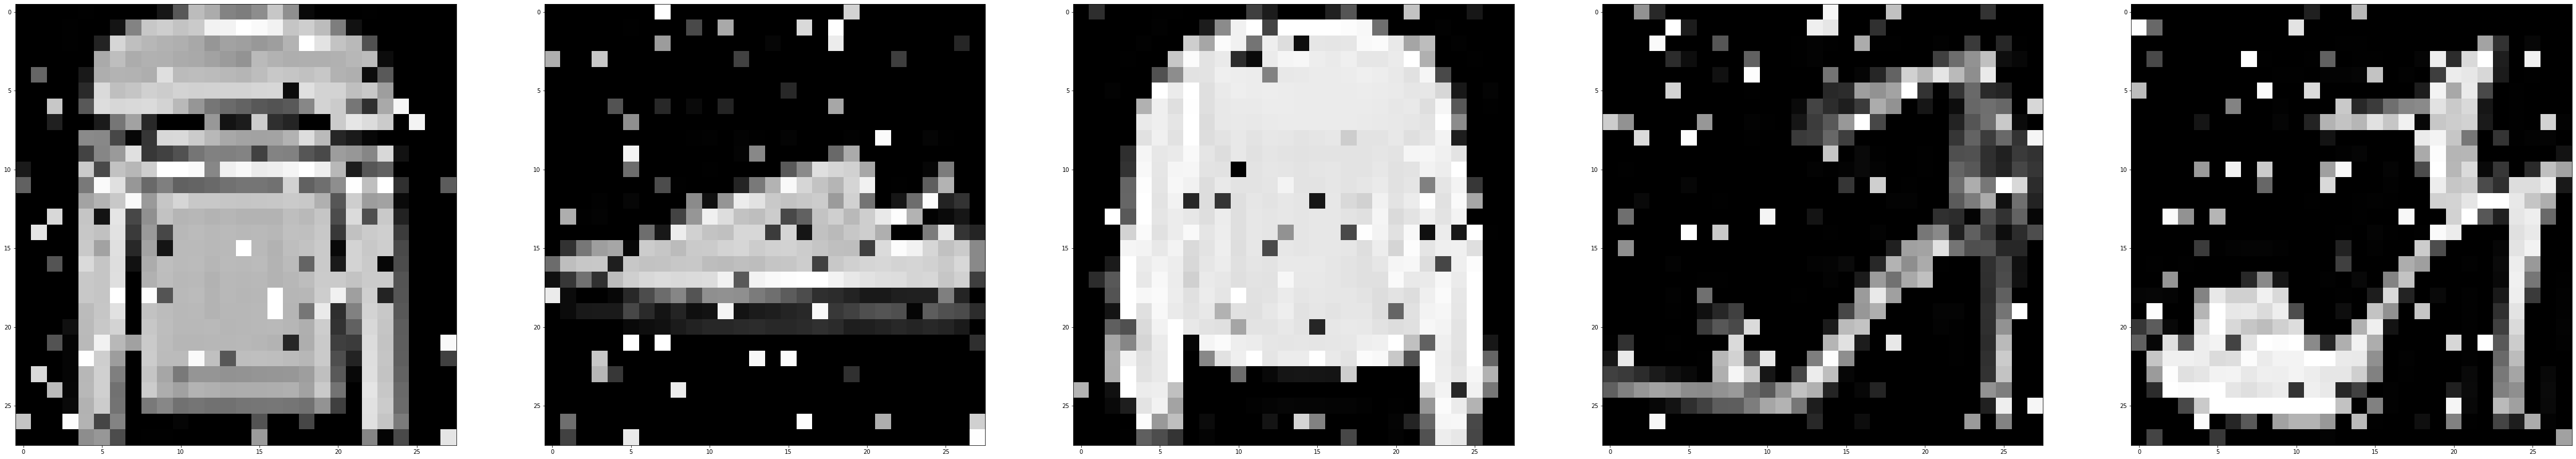

In [9]:
f,ax = plt.subplots(1,5)
f.set_size_inches(80,40)
for i in range(5,10):
  ax[i-5].imshow(train_x_n[i,:,:,0].reshape(28,28))

In [0]:
batch_size = 128
epochs = 50
inChannel = 1
x, y = 28, 28
input_img = tf.keras.layers.Input(shape = (x, y, inChannel))

In [0]:
def autoencoder(input_img):
    
    conv1 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img) #28 x 28 x 32
    pool1 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv1) #14 x 14 x 32
    conv2 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(pool1) #14 x 14 x 64
    pool2 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv2) #7 x 7 x 64
    conv3 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(pool2) #7 x 7 x 128 (small and thick)

    #decoder
    conv4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(conv3) #7 x 7 x 128
    up1 = tf.keras.layers.UpSampling2D((2,2))(conv4) # 14 x 14 x 128
    conv5 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(up1) # 14 x 14 x 64
    up2 = tf.keras.layers.UpSampling2D((2,2))(conv5) # 28 x 28 x 64
    decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(up2) # 28 x 28 x 1
    return decoded

In [0]:
from keras.layers import Input,Conv2D,MaxPooling2D,UpSampling2D
from keras.models import Model
from keras.optimizers import RMSprop

In [13]:
autoencoder = tf.keras.Model(input_img, autoencoder(input_img))
autoencoder.compile(loss='mean_squared_error', optimizer = 'rmsprop')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [14]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 128)         147584

In [15]:
autoencoder_train = autoencoder.fit(train_x_n, x_train, batch_size=batch_size,
                                    epochs=epochs,verbose=1,validation_data=(val_x_n, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 16s 270us/sample - loss: 0.0229 - val_loss: 0.0116
Epoch 2/50
60000/60000 [==============================] - 6s 104us/sample - loss: 0.0104 - val_loss: 0.0098
Epoch 3/50
60000/60000 [==============================] - 6s 104us/sample - loss: 0.0083 - val_loss: 0.0075
Epoch 4/50
60000/60000 [==============================] - 6s 104us/sample - loss: 0.0073 - val_loss: 0.0073
Epoch 5/50
60000/60000 [==============================] - 6s 104us/sample - loss: 0.0066 - val_loss: 0.0068
Epoch 6/50
60000/60000 [==============================] - 6s 103us/sample - loss: 0.0062 - val_loss: 0.0060
Epoch 7/50
60000/60000 [==============================] - 6s 103us/sample - loss: 0.0058 - val_loss: 0.0055
Epoch 8/50
60000/60000 [==============================] - 6s 104us/sample - loss: 0.0056 - val_loss: 0.0052
Epoch 9/50
60000/60000 [==============================] - 6s 103us/sample - loss: 0.0

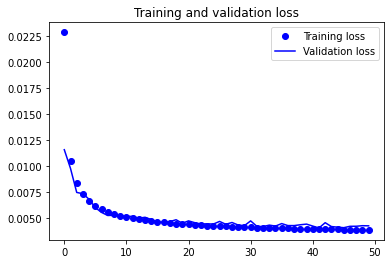

In [16]:
loss = autoencoder_train.history['loss']
val_loss = autoencoder_train.history['val_loss']
epochs = range(epochs)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [0]:
pred = autoencoder.predict(val_x_n)

Test Images


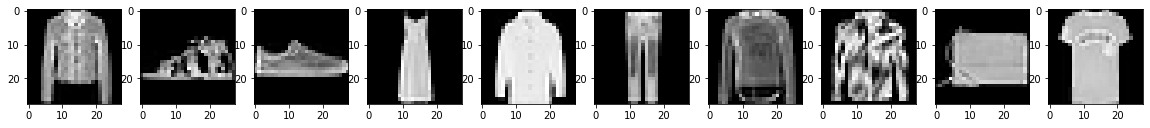

Test Images with Noise


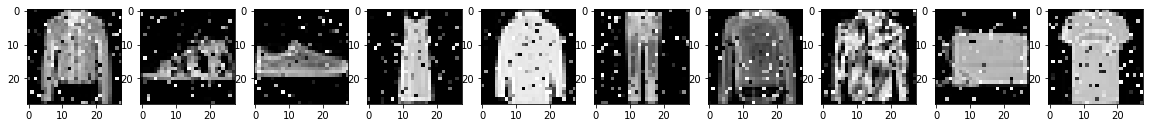

Reconstruction of Noisy Test Images


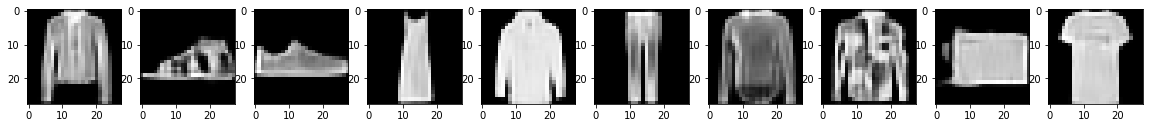

In [18]:
plt.figure(figsize=(20, 4))
print("Test Images")
for i in range(10,20,1):
    plt.subplot(2, 10, i+1)
    plt.imshow(x_test[i, ..., 0], cmap='gray')
    #curr_lbl = test_labels[i]
    #plt.title("(Label: "  + ")")
plt.show()    
plt.figure(figsize=(20, 4))
print("Test Images with Noise")
for i in range(10,20,1):
    plt.subplot(2, 10, i+1)
    plt.imshow(val_x_n[i, ..., 0], cmap='gray')
plt.show()    

plt.figure(figsize=(20, 4))
print("Reconstruction of Noisy Test Images")
for i in range(10,20,1):
    plt.subplot(2, 10, i+1)
    plt.imshow(pred[i, ..., 0], cmap='gray')  
plt.show()